# Dependencies

In [1]:
pacman::p_load(
    patchwork,
    igraph, graphlayouts, ggraph, ggforce, dplyr, ggplot2, GUniFrac, ggsignif,
    dendextend, ComplexHeatmap, ANCOMBC, TreeSummarizedExperiment, lsmeans, factoextra
)


# Functions

In [2]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [3]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [4]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/run_gliph/"

# Main

In [5]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [6]:
#remove those samples that we did not have the TCRseq data for
meta_div <- meta_div[!is.na(meta_div$TRB),]

In [11]:
gliph_out <- readr::read_csv(paste0(h4hpath, "/v5/gliph_output/int_vdj_v5_cluster.csv"), col_names = T) #  gliph reference dataset  is MItechel

Rows: 98847 Columns: 29
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (17): pattern, type, TcRb, V, J, Sample, HLA-A, HLA-B, HLA-C, HLA-DPA1, ...
dbl (11): index, Fisher_score, number_subject, number_unique_cdr3, final_sco...
lgl  (1): TcRa

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [12]:
# remove columns starting with HLA
gliph_out <- gliph_out[,!grepl("HLA", colnames(gliph_out))]

In [13]:
head(gliph_out)

index,pattern,Fisher_score,number_subject,number_unique_cdr3,final_score,hla_score,vb_score,expansion_score,length_score,cluster_size_score,type,TcRb,V,J,TcRa,Sample,Freq
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,1.4e-05,global-SLG%E,CASSLGTEQFF,TRBV27,TRBJ2-1,NA,Leukemia:CHP_405_X05-cfDNA,729
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,1.4e-05,global-SLG%E,CASSLGAEAFF,TRBV6_7,NA,NA,MDavis:DRB10401,1
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,1.4e-05,global-SLG%E,YASSLGGEQFF,TRBV6_7,NA,NA,MDavis:DRB10401,1
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,1.4e-05,global-SLG%E,CASSLGVEQYF,TRBV27,TRBJ2-7,NA,Leukemia:CHP_359_X03-PBMC,24
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,1.4e-05,global-SLG%E,CASSLGAEQYF,TRBV6_7,NA,NA,MDavis:DRB10401,1
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,1.4e-05,global-SLG%E,CAWSLGDEQYF,TRBV6_7-or30_1,NA,NA,MDavis:C0304_DQA10303_DRB10401,1


In [14]:
tmp <- gliph_out[ gliph_out$pattern != "single",]
tmp <- tmp[tmp$number_unique_cdr3 >= 3,]
# only those patterns with CHP samples
importantgliphs <- tmp$pattern[ grepl("CHP", tmp$Sample)]
tmp <- tmp[ tmp$pattern %in% importantgliphs,]

In [15]:
head(tmp)

index,pattern,Fisher_score,number_subject,number_unique_cdr3,final_score,hla_score,vb_score,expansion_score,length_score,cluster_size_score,type,TcRb,V,J,TcRa,Sample,Freq
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,1.4e-05,global-SLG%E,CASSLGTEQFF,TRBV27,TRBJ2-1,NA,Leukemia:CHP_405_X05-cfDNA,729
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,1.4e-05,global-SLG%E,CASSLGAEAFF,TRBV6_7,NA,NA,MDavis:DRB10401,1
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,1.4e-05,global-SLG%E,YASSLGGEQFF,TRBV6_7,NA,NA,MDavis:DRB10401,1
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,1.4e-05,global-SLG%E,CASSLGVEQYF,TRBV27,TRBJ2-7,NA,Leukemia:CHP_359_X03-PBMC,24
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,1.4e-05,global-SLG%E,CASSLGAEQYF,TRBV6_7,NA,NA,MDavis:DRB10401,1
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,1.4e-05,global-SLG%E,CAWSLGDEQYF,TRBV6_7-or30_1,NA,NA,MDavis:C0304_DQA10303_DRB10401,1


In [16]:
tmp$cdr3_sample <- paste(tmp$TcRb, tmp$Sample, sep = "_")

In [17]:
components <- read.table(paste0(datapath, "GLIPH/component_stats_intercept_cdr3_gliph2.csv"), sep = ",", header = T)

In [18]:
int_all <- readr::read_rds(file = paste0(datapath, "capTCRseq/INT_all_gliph_input_v2.rds"))

In [19]:
# remove space
int_all$`subject:condition` <- gsub(" ", "", int_all$`subject:condition`)

In [20]:
int_all$basename <- gsub(".*:", "", int_all$`subject:condition`)

In [21]:
int_all$cdr3_cancer_basename <- paste0(int_all$CDR3b, "_", int_all$`subject:condition`)

In [22]:
head(int_all$cdr3_cancer_basename)

[1] "CASSHPDAVNTEAFF_Solidtumors:CHP_350_X01-PBMC"
[2] "CASSFSLAAYGEQYF_Solidtumors:CHP_350_X01-PBMC"
[3] "CASTRLLGNTEAFF_Solidtumors:CHP_350_X01-PBMC" 
[4] "CASSSFGQGINTIYF_Solidtumors:CHP_350_X01-PBMC"
[5] "CASSPRIGQGAPLHF_Solidtumors:CHP_350_X01-PBMC"
[6] "CATSRTGGGNTEAFF_Solidtumors:CHP_350_X01-PBMC"

In [23]:
colnames(components)

[1] "Component_id"                  "Component_size"               
 [3] "PatientDerived_Nodes"          "NumberOf_PatientDerived_Nodes"
 [5] "Number_of_Patients"            "Sample_Type_Range"            
 [7] "Timepoint_Range"               "Number_of_Timepoints"         
 [9] "Component_specificity"         "KnownExternalTCRs"

In [24]:
# separate rows
components_sep <- tidyr::separate_rows(components, PatientDerived_Nodes, sep = ",")

In [25]:
components_sep$PatientDerived_Nodes[1]

[1] "CAAAGGGEAFF_Leukemia:CHP_396_X04-PBMC"

In [26]:
sampletype <- "PBMC"

In [27]:
components_sep_sampletype <- components_sep[grepl(sampletype, components_sep$PatientDerived_Nodes),]

In [28]:
# generate new columns TCR, cancergroup, sample, patient, cycle
components_sep_sampletype$basename <- gsub(".*:", "", components_sep_sampletype$PatientDerived_Nodes)
components_sep_sampletype$Patient <- gsub("_X.*", "", components_sep_sampletype$basename)
components_sep_sampletype$cycle <- gsub(".*X", "X", components_sep_sampletype$basename)
components_sep_sampletype$cycle <- substring(components_sep_sampletype$cycle, 1, 3)

components_sep_sampletype$cancergroup_cdr3 <- gsub(":.*", "", components_sep_sampletype$PatientDerived_Nodes)
components_sep_sampletype$cdr3 <- gsub("_.*", "", components_sep_sampletype$cancergroup_cdr3)
components_sep_sampletype$cancergroup <- gsub(".*_", "", components_sep_sampletype$cancergroup_cdr3)

In [29]:
# add cloneCount
rowmatch <- match(components_sep_sampletype$PatientDerived_Nodes, int_all$cdr3_cancer_basename)
components_sep_sampletype$cloneCount <- int_all$count[rowmatch]

In [30]:
# add Fisher score
rowmatch <- match(components_sep_sampletype$PatientDerived_Nodes, tmp$cdr3_sample)
components_sep_sampletype$Fisher_score <- tmp$Fisher_score[rowmatch]

In [31]:
table(components_sep_sampletype$cancergroup)


               LFS           Leukemia           Lymphoma             Normal 
               319               5546                710                 31 
       Solidtumors T-cellmalignancies 
              2470                474 

In [32]:
# remove X00
components_sep_sampletype <- components_sep_sampletype[!grepl("X00", components_sep_sampletype$cycle),]

In [33]:
# get patients with more than one timepoiint and baseline
mytab <- table(components_sep_sampletype$Patient, components_sep_sampletype$cycle)
mytab <- mytab[rowSums(mytab != 0) > 1, ] # patients with more than one timepoint
baseline_patients <- rownames(mytab)[mytab[, 1] > 0] # patients with baseline

In [34]:
head(mytab)

         
          X01 X02 X03 X04 X05
  CHP_323   0   0   9   0  29
  CHP_328   0   0   0 101  22
  CHP_331   0   0   0   6  30
  CHP_338   0   0  82  27  67
  CHP_339   0   0   5   0  35
  CHP_340   0   0  25  27  97

In [35]:
df1 <- components_sep_sampletype[components_sep_sampletype$Patient %in% baseline_patients, ]

In [36]:
# separate pre and post
df1_pre <- df1[ df1$cycle == "X01",]
df1_post <- df1[ df1$cycle != "X01",]

In [37]:
# group by patient and pattern, average frequencyes across samples postchemo
df1_post_sum <- df1_post %>%
  group_by(Patient, Component_id) %>%
  summarise(SumCount = sum(cloneCount), .groups = 'drop') %>%
  ungroup()

In [38]:
# group by samples and patterns, avergae the frequencies, if there is > 1 CDR3s in a pattern
df1_pre_sum <- df1_pre %>%
  group_by(basename, Component_id) %>%
  summarise(SumCount = mean(cloneCount), .groups = 'drop') %>%
  ungroup()

In [39]:
head(df1_post_sum)

Patient,Component_id,SumCount
<chr>,<int>,<int>
CHP_347,1,1248
CHP_347,4,32
CHP_347,5,34
CHP_347,6,180
CHP_347,7,39
CHP_347,8,43


In [40]:
head(df1_pre_sum)

basename,Component_id,SumCount
<chr>,<int>,<dbl>
CHP_347_X01-PBMC,1,47.50000
CHP_347_X01-PBMC,4,101.00000
CHP_347_X01-PBMC,6,45.00000
CHP_347_X01-PBMC,13,19.00000
CHP_348_X01-PBMC,1,12.22222
CHP_348_X01-PBMC,4,10.00000


In [41]:
df1_pre_sum$Patient <- gsub(".*CHP", "CHP", df1_pre_sum$basename)
df1_pre_sum$Patient <- gsub("_X.*", "", df1_pre_sum$Patient)

df1_pre_sum$cycle <- gsub(".*X", "X", df1_pre_sum$basename)
df1_pre_sum$cycle <- gsub("-.*", "", df1_pre_sum$cycle)

In [42]:
head(df1_pre_sum)

basename,Component_id,SumCount,Patient,cycle
<chr>,<int>,<dbl>,<chr>,<chr>
CHP_347_X01-PBMC,1,47.50000,CHP_347,X01
CHP_347_X01-PBMC,4,101.00000,CHP_347,X01
CHP_347_X01-PBMC,6,45.00000,CHP_347,X01
CHP_347_X01-PBMC,13,19.00000,CHP_347,X01
CHP_348_X01-PBMC,1,12.22222,CHP_348,X01
CHP_348_X01-PBMC,4,10.00000,CHP_348,X01


In [43]:
# matrix gliph x patient
comppat_mat <- matrix(NA,
    nrow = length(unique(df1$Component_id)), ncol = length(unique(df1$Patient)),
    dimnames = list(unique(df1$Component_id), unique(df1$Patient))
)

In [44]:
for (i in 1:nrow(comppat_mat)) { # pattern loop
    for (j in 1:ncol(comppat_mat)) { # patient loop
        myc <- rownames(comppat_mat)[i]
        mypt <- colnames(comppat_mat)[j]
        pt_pre <- df1_pre_sum[df1_pre_sum$Patient == mypt, ]
        pt_post <- df1_post_sum[df1_post_sum$Patient == mypt, ]
        if (length(pt_pre$SumCount[pt_pre$Component_id == myc]) != 0 && length(pt_post$SumCount[pt_post$Component_id == myc]) != 0) { # if pattern is present in both pre and post
            comppat_mat[i, j] <- pt_post$SumCount[pt_post$Component_id == myc] - pt_pre$SumCount[pt_pre$Component_id == myc] # post - pre
        } # end of if
    } # end of patient loop
} # end of pattern loop

In [45]:
comppat_mat <- as.data.frame(comppat_mat)

In [46]:
# group by component_id, avergae the fisher score
df1 <- df1 %>%
  group_by(Component_id) %>%
  mutate(MeanFisher = mean(Fisher_score, na.rm = T)) %>%
  ungroup()

In [47]:
# Add Fisher score to comppat_mat
comppat_mat$MeanFisher <- df1$MeanFisher[match(rownames(comppat_mat), df1$Component_id)]

In [48]:
head(comppat_mat)

,CHP_396,CHP_357,CHP_404,CHP_408,CHP_381,CHP_409,CHP_373,CHP_405,CHP_353,CHP_415,...,CHP_366,CHP_348,CHP_397,CHP_370,CHP_410,CHP_349,CHP_413,CHP_387,CHP_367,MeanFisher
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,31185.25,2325.94872,19306.57,12379.5,1199.403226,1530.263,39.53191,24139.6,1912.48485,5373.8,...,25798.62,22.77778,13042.12,1392.5,5774.417,1444.25,26603,62.723404,273.6,1.317950e-03
2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.000000e+00
3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,7.400000e-38
4,129.00,204.00000,1134.50,NA,-124.500000,NA,NA,NA,NA,NA,...,NA,NA,239.00,NA,115.000,NA,NA,NA,NA,8.913701e-04
5,NA,NA,431.00,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.587323e-04
6,999.50,64.33333,1222.00,724.0,9.416667,NA,0.50000,NA,55.33333,NA,...,668.00,NA,NA,NA,138.000,NA,NA,4.333333,NA,1.693262e-04


In [49]:
comppat_mat$Component_id <- rownames(comppat_mat)

In [50]:
colnames(components)

[1] "Component_id"                  "Component_size"               
 [3] "PatientDerived_Nodes"          "NumberOf_PatientDerived_Nodes"
 [5] "Number_of_Patients"            "Sample_Type_Range"            
 [7] "Timepoint_Range"               "Number_of_Timepoints"         
 [9] "Component_specificity"         "KnownExternalTCRs"

In [51]:
# match component_ids and add Component_specificity from components to comppat_mat
comppat_mat$Component_specificity <- components$Component_specificity[match(comppat_mat$Component_id, components$Component_id)]

In [52]:
# remove cancergroups from Component_specificity
comppat_mat$Component_specificity <- gsub("Lymphoma", "", comppat_mat$Component_specificity)
comppat_mat$Component_specificity <- gsub("Leukemia", "", comppat_mat$Component_specificity)
comppat_mat$Component_specificity <- gsub("LFS", "", comppat_mat$Component_specificity)
comppat_mat$Component_specificity <- gsub("Solidtumors", "", comppat_mat$Component_specificity)
comppat_mat$Component_specificity <- gsub("T-cellmalignancies", "", comppat_mat$Component_specificity)
comppat_mat$Component_specificity <- gsub("Normal", "", comppat_mat$Component_specificity)
comppat_mat$Component_specificity <- gsub("MDavis", "", comppat_mat$Component_specificity)

In [53]:
comppat_mat$Component_specificity <- gsub(",,", "", comppat_mat$Component_specificity)
# trailing ,
comppat_mat$Component_specificity <- gsub(",$", "", comppat_mat$Component_specificity)
# leading ,
comppat_mat$Component_specificity <- gsub("^,", "", comppat_mat$Component_specificity)

In [54]:
tail(comppat_mat)

,CHP_396,CHP_357,CHP_404,CHP_408,CHP_381,CHP_409,CHP_373,CHP_405,CHP_353,CHP_415,...,CHP_397,CHP_370,CHP_410,CHP_349,CHP_413,CHP_387,CHP_367,MeanFisher,Component_id,Component_specificity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
244,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,0.035,244,S-pneumoniae
245,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NaN,245,
246,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NaN,246,
247,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,0.056,247,
248,-80,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,0.095,248,
249,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,0.100,249,


In [55]:
# long format keep fisher and gliph as columns
comppat_mat_long <- tidyr::pivot_longer(comppat_mat, -c("MeanFisher", "Component_id", "Component_specificity"), names_to = "Patient", values_to = "Delta")

In [56]:
# remove rows with NA
comppat_mat_long <- comppat_mat_long[ !is.na(comppat_mat_long$Delta), ]

In [57]:
head(comppat_mat_long)

MeanFisher,Component_id,Component_specificity,Patient,Delta
<dbl>,<chr>,<chr>,<chr>,<dbl>
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_396,31185.250
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_357,2325.949
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_404,19306.571
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_408,12379.500
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_381,1199.403
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_409,1530.263


In [58]:
comppat_mat_long$cancergroup <- meta_div$cancergroup[match(comppat_mat_long$Patient, meta_div$Patient)]
comppat_mat_long$Disease <- meta_div$Disease_type[match(comppat_mat_long$Patient, meta_div$Patient)]
comppat_mat_long$Relapse <- meta_div$Relapse[match(comppat_mat_long$Patient, meta_div$Patient)]

In [59]:
head(comppat_mat_long)

MeanFisher,Component_id,Component_specificity,Patient,Delta,cancergroup,Disease,Relapse
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_396,31185.250,Leukemia,HR ALL,0
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_357,2325.949,Leukemia,AML,0
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_404,19306.571,Solid tumors,ERMS,0
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_408,12379.500,Solid tumors,OS,0
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_381,1199.403,Solid tumors,EWS,0
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_409,1530.263,Solid tumors,EWS,0


In [60]:
quantile(comppat_mat_long$Delta, c(0.1, 0.9))

10%      90% 
 -46.500 8613.168

In [61]:
# comppat_mat_long$antigen[ is.na(comppat_mat_long$antigen)] <- "Unknown"

In [62]:
comppat_mat_long$log10MeanFisher <- -log10(comppat_mat_long$MeanFisher)

In [63]:
head(comppat_mat_long)

MeanFisher,Component_id,Component_specificity,Patient,Delta,cancergroup,Disease,Relapse,log10MeanFisher
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_396,31185.250,Leukemia,HR ALL,0,2.880101
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_357,2325.949,Leukemia,AML,0,2.880101
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_404,19306.571,Solid tumors,ERMS,0,2.880101
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_408,12379.500,Solid tumors,OS,0,2.880101
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_381,1199.403,Solid tumors,EWS,0,2.880101
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_409,1530.263,Solid tumors,EWS,0,2.880101


In [64]:
summary(comppat_mat_long$MeanFisher)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
0.000014 0.000169 0.000891 0.003331 0.001318 0.095000        4 

In [65]:
# remove NA
comppat_mat_long <- comppat_mat_long[!is.na(comppat_mat_long$MeanFisher),]

In [66]:
comppat_mat_long_summary <- comppat_mat_long %>%
  group_by(Component_id) %>%
  mutate(MeanDelta = mean(Delta)) %>%
  ungroup()

In [67]:
comppat_mat_long_summary <- comppat_mat_long_summary %>%
  group_by(Component_id) %>%
  mutate(UniquePatients = n_distinct(Patient)) %>%
  ungroup()

In [68]:
comppat_mat_long_summary <- comppat_mat_long_summary[ !duplicated(comppat_mat_long_summary$Component_id),]

In [69]:
comppat_mat_long_summary[ order(comppat_mat_long_summary$MeanFisher),]

MeanFisher,Component_id,Component_specificity,Patient,Delta,cancergroup,Disease,Relapse,log10MeanFisher,MeanDelta,UniquePatients
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>
0.0000140625,17,CMV,CHP_357,-12.00,Leukemia,AML,0,4.851937,-12.0000,1
0.0000824899,7,"CMV,HomoSapiens",CHP_396,1910.00,Leukemia,HR ALL,0,4.083599,246.5000,8
0.0001473105,8,,CHP_404,354.00,Solid tumors,ERMS,0,3.831766,354.0000,1
0.0001587323,5,"EBV,HomoSapiens,HPV",CHP_404,431.00,Solid tumors,ERMS,0,3.799335,431.0000,1
0.0001693262,6,"CMV,EBV,HomoSapiens,HPV",CHP_396,999.50,Leukemia,HR ALL,0,3.771276,252.7685,19
0.0001700000,171,,CHP_396,1386.50,Leukemia,HR ALL,0,3.769551,1386.5000,1
0.0002757693,12,,CHP_378,-11.00,Leukemia,ALL,0,3.559454,-11.0000,1
0.0003946483,10,"EBV,HomoSapiens",CHP_404,711.00,Solid tumors,ERMS,0,3.403790,299.0000,3
0.0005486333,13,"CMV,EBV,HPV",CHP_357,-26.50,Leukemia,AML,0,3.260718,-108.4259,9


In [70]:
(comppat_mat_long[ comppat_mat_long$Component_id == 7,])

mypts <- comppat_mat_long$Patient[ comppat_mat_long$Component_id == 7]

MeanFisher,Component_id,Component_specificity,Patient,Delta,cancergroup,Disease,Relapse,log10MeanFisher
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
8.24899e-05,7,"CMV,HomoSapiens",CHP_396,1910.0,Leukemia,HR ALL,0,4.083599
8.24899e-05,7,"CMV,HomoSapiens",CHP_357,5.0,Leukemia,AML,0,4.083599
8.24899e-05,7,"CMV,HomoSapiens",CHP_404,61.0,Solid tumors,ERMS,0,4.083599
8.24899e-05,7,"CMV,HomoSapiens",CHP_381,-152.5,Solid tumors,EWS,0,4.083599
8.24899e-05,7,"CMV,HomoSapiens",CHP_353,39.0,Leukemia,AML,1,4.083599
8.24899e-05,7,"CMV,HomoSapiens",CHP_363,-51.5,Solid tumors,EWS,0,4.083599
8.24899e-05,7,"CMV,HomoSapiens",CHP_365,161.0,Leukemia,ALL,0,4.083599
8.24899e-05,7,"CMV,HomoSapiens",CHP_368,0.0,Solid tumors,ARMS,1,4.083599


In [71]:
dim(comppat_mat)

[1] 171  36

In [72]:
head(comppat_mat[, colnames(comppat_mat)[colnames(comppat_mat) %in% mypts]], 10)

,CHP_396,CHP_357,CHP_404,CHP_381,CHP_353,CHP_363,CHP_365,CHP_368
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,31185.25,2325.94872,19306.57,1199.403226,1912.48485,1244.90984,7946.135,1447.41026
2,NA,NA,NA,NA,NA,NA,NA,NA
3,NA,NA,NA,NA,NA,NA,NA,NA
4,129.00,204.00000,1134.50,-124.500000,NA,NA,590.000,88.66667
5,NA,NA,431.00,NA,NA,NA,NA,NA
6,999.50,64.33333,1222.00,9.416667,55.33333,-27.33333,480.000,1.00000
7,1910.00,5.00000,61.00,-152.500000,39.00000,-51.50000,161.000,0.00000
8,NA,NA,354.00,NA,NA,NA,NA,NA
9,NA,NA,NA,NA,NA,NA,NA,NA


In [73]:
head(comppat_mat_long)

MeanFisher,Component_id,Component_specificity,Patient,Delta,cancergroup,Disease,Relapse,log10MeanFisher
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_396,31185.250,Leukemia,HR ALL,0,2.880101
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_357,2325.949,Leukemia,AML,0,2.880101
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_404,19306.571,Solid tumors,ERMS,0,2.880101
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_408,12379.500,Solid tumors,OS,0,2.880101
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_381,1199.403,Solid tumors,EWS,0,2.880101
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_409,1530.263,Solid tumors,EWS,0,2.880101


In [74]:
myorder <- unique(comppat_mat_long$Component_id[ order(comppat_mat_long$MeanFisher)] )

comppat_mat_long$Component_id <- factor(comppat_mat_long$Component_id, levels = myorder)

In [75]:
myorder

[1] "17"  "7"   "8"   "5"   "6"   "171" "12"  "10"  "13"  "4"   "214" "1"  
[13] "11"  "69"  "56"  "222" "111" "248"

In [76]:
head(comppat_mat_long)

MeanFisher,Component_id,Component_specificity,Patient,Delta,cancergroup,Disease,Relapse,log10MeanFisher
<dbl>,<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_396,31185.250,Leukemia,HR ALL,0,2.880101
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_357,2325.949,Leukemia,AML,0,2.880101
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_404,19306.571,Solid tumors,ERMS,0,2.880101
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_408,12379.500,Solid tumors,OS,0,2.880101
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_381,1199.403,Solid tumors,EWS,0,2.880101
0.00131795,1,"CEF,CMV,EBV,HCV,HomoSapiens,HPV,InfluenzaM.tuberculosis,MCPyV,S-pneumoniae",CHP_409,1530.263,Solid tumors,EWS,0,2.880101


In [86]:
comppat_mat_long[which(comppat_mat_long$MeanFisher < 0.001), ]

MeanFisher,Component_id,Component_specificity,Patient,Delta,cancergroup,Disease,Relapse,log10MeanFisher
<dbl>,<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
0.0008913701,4,"CMV,HCV,HomoSapiens,HPV",CHP_396,129.000000,Leukemia,HR ALL,0,3.049942
0.0008913701,4,"CMV,HCV,HomoSapiens,HPV",CHP_357,204.000000,Leukemia,AML,0,3.049942
0.0008913701,4,"CMV,HCV,HomoSapiens,HPV",CHP_404,1134.500000,Solid tumors,ERMS,0,3.049942
0.0008913701,4,"CMV,HCV,HomoSapiens,HPV",CHP_381,-124.500000,Solid tumors,EWS,0,3.049942
0.0008913701,4,"CMV,HCV,HomoSapiens,HPV",CHP_347,-69.000000,Leukemia,ALL,0,3.049942
0.0008913701,4,"CMV,HCV,HomoSapiens,HPV",CHP_350,7.000000,Solid tumors,HB,0,3.049942
0.0008913701,4,"CMV,HCV,HomoSapiens,HPV",CHP_378,4.500000,Leukemia,ALL,0,3.049942
0.0008913701,4,"CMV,HCV,HomoSapiens,HPV",CHP_365,590.000000,Leukemia,ALL,0,3.049942
0.0008913701,4,"CMV,HCV,HomoSapiens,HPV",CHP_368,88.666667,Solid tumors,ARMS,1,3.049942


In [87]:
summary(comppat_mat_long$Delta[which(comppat_mat_long$MeanFisher < 0.001) ])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -848.0   -11.0    47.0   243.3   239.0  2668.0 

In [125]:
p4 <- ggplot(
    comppat_mat_long[which(comppat_mat_long$MeanFisher < 0.001), ],
    aes(x = Delta, y = Component_id, color = cancergroup, shape = as.factor(Relapse) )
) +
    geom_jitter(size = 5, width = 0, height = 0.3) +
    myplot +
    myaxis +
    theme(
        plot.title = element_text(size = 20),
        legend.position = "none", axis.title.y = element_blank(),
        axis.title.x = element_blank(), axis.text.x = element_text(size = 20, angle = 0, hjust = 0.5)
    ) +
    ggtitle(expression(underline("Clonal Change in TCR specificity graph components"))) +
    scale_color_manual(values = group_col) +
     geom_hline(yintercept = c(1.5, 2.5, 3.5, 4.5, 5.5,
     6.5, 7.5, 8.5, 9.5, 10.5 ), color = "grey", linetype = "dotted") 


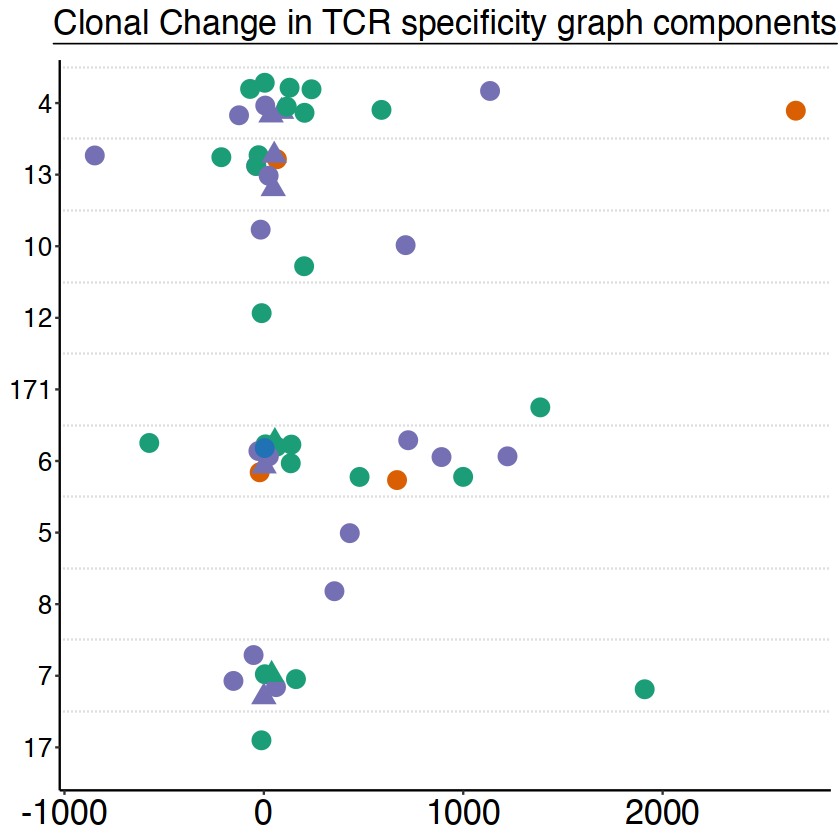

In [126]:
p4

In [127]:
comppat_mat_unique <- comppat_mat_long[ !duplicated(comppat_mat_long$Component_id),]

In [128]:
p1 <- ggplot(comppat_mat_unique[which(comppat_mat_unique$MeanFisher < 0.001), ], 
aes(x = Component_id, y = MeanFisher)) +
  geom_bar(stat = "identity", width = 0.8, alpha = 1) +
  coord_flip() +
  scale_y_reverse() +
  myplot +
 theme( legend.position = "none",  plot.title = element_text(size = 20),
   axis.text.y = element_blank(), axis.title.y = element_blank(), 
   axis.ticks.y = element_blank(), axis.line.y = element_blank(),
   axis.title.x = element_blank(), axis.text.x = element_text(angle = 30, size = 20, hjust = 1)
 ) + ggtitle(expression(underline("Average specificity Fisher score"))) 


In [129]:
summary(comppat_mat_unique$MeanFisher)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
1.406e-05 1.695e-04 7.200e-04 7.001e-03 1.416e-03 9.500e-02 

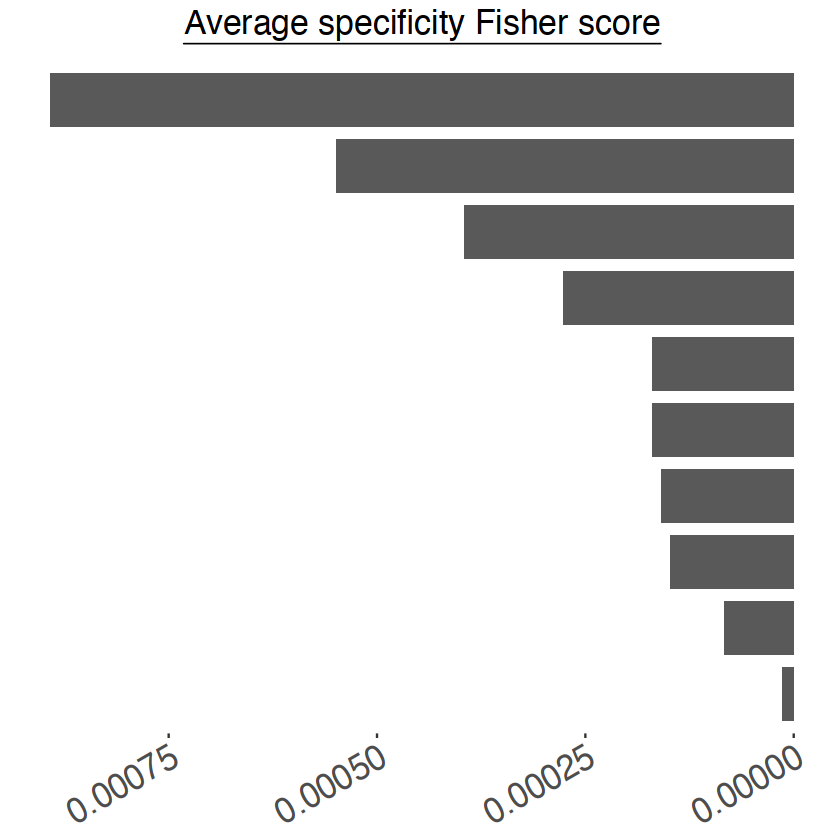

In [130]:
p1

In [131]:
mycomps <- comppat_mat_unique[which(comppat_mat_unique$MeanFisher < 0.001), ]

In [132]:
mycomps$x <- 1

In [137]:
mycomps$Component_specificity[ mycomps$Component_specificity == ""] <- "Unknown"

In [138]:
text_plot <- ggplot(mycomps, aes(x = x, y = Component_id, label = Component_specificity)) +
  geom_text(size = 7) +
  myplot +
 theme(legend.position = "none", plot.title = element_text(size = 20),
   axis.text = element_blank(), axis.title = element_blank(), 
   axis.ticks = element_blank(), axis.line = element_blank()
 ) +
  ggtitle(expression(underline("Graph component annotations")))


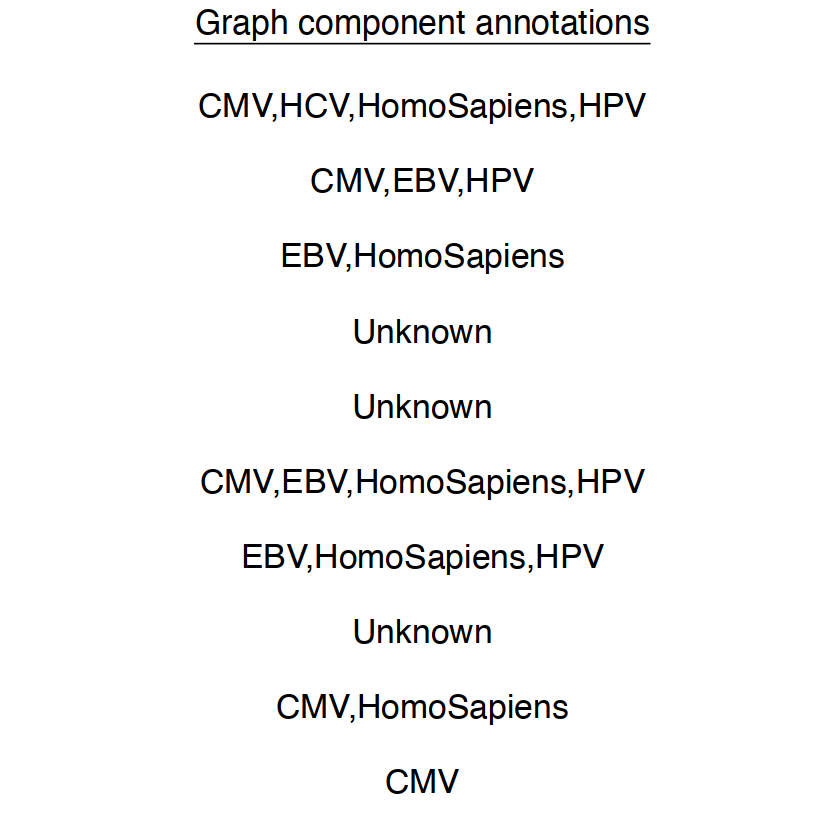

In [139]:
text_plot

In [140]:
pdf(paste0(plotpath, "gliph_component_plot.pdf"), width = 18, height = 7)
p1 + p4 + text_plot +
    plot_layout(widths = c(0.4, 1, 0.4))
dev.off()


pdf 
  2